In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [60]:
df_raw=pd.read_csv("Train_Dataset.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [61]:
df_raw.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [62]:
df_raw.loc[df_raw.Own_House_Age >0, 'House_Own'] = 1
df_raw.loc[df_raw.House_Own== 0, 'Own_House_Age'] = 0
df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Occupation'] = "Not Working"
df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Occupation'] = "Self-employed"

df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["#VALUE!"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["$"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].apply(pd.to_numeric)

#df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Income'] = "0"
#df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Income'] = "0"
df_raw["Client_Income"]=df_raw["Client_Income"].replace(["$"],np.nan)
df_raw["Client_Income"]=df_raw["Client_Income"].apply(pd.to_numeric)

df_raw["Credit_Amount"]=df_raw["Credit_Amount"].replace(["$"],np.nan)
df_raw["Credit_Amount"]=df_raw["Credit_Amount"].apply(pd.to_numeric)

df_raw["Age_Days"]=df_raw["Age_Days"].replace(["x"],np.nan)
df_raw["Age_Days"]=df_raw["Age_Days"].apply(pd.to_numeric)
df_raw["Age_Days"]=round(df_raw["Age_Days"]/365,0)

df_raw["Employed_Days"]=df_raw["Employed_Days"].replace(["x"],np.nan)
df_raw["Employed_Days"]=df_raw["Employed_Days"].apply(pd.to_numeric)
df_raw["Employed_Days"]=round(df_raw["Employed_Days"]/365,0)
df_raw["Employed_Days"]=df_raw["Employed_Days"].replace([1001],0)

df_raw["Registration_Days"]=df_raw["Registration_Days"].replace(["x"],np.nan)
df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

df_raw["ID_Days"]=df_raw["ID_Days"].replace(["x"],np.nan)
df_raw["ID_Days"]=df_raw["ID_Days"].apply(pd.to_numeric)

df_raw["Type_Organization"]=df_raw["Type_Organization"].replace(["XNA"],'Not Working')
df_raw['Client_Gender']=df_raw['Client_Gender'].replace(["XNA"],np.nan)

df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["@"],np.nan)
df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["#"],np.nan)
df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].apply(pd.to_numeric)

df_raw["Score_Source_3"]=df_raw["Score_Source_3"].replace(["&"],np.nan)
df_raw['Score_Source_3']=df_raw['Score_Source_3'].apply(pd.to_numeric)

for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
    feature_name = 'Score_Sources_{}'.format(function_name.upper())
    df_raw[feature_name] = eval('np.{}'.format(function_name))(
        df_raw[['Score_Source_1', 'Score_Source_2', 'Score_Source_3']], axis=1)
df_raw['Score_Sources_Prod'] = df_raw['Score_Source_1'] * df_raw['Score_Source_2'] * df_raw['Score_Source_3']

df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

#Custom Labels
df_raw['Loan_annuity_income_ratio']=df_raw['Loan_Annuity']/df_raw['Client_Income']
df_raw['Client_Income_yearly']=df_raw['Client_Income']*12
df_raw['Credit_income_ratio']=df_raw['Credit_Amount']/df_raw['Client_Income']
df_raw['Credit_term']=df_raw['Credit_Amount']/df_raw['Loan_Annuity']
df_raw['Years_employed_age_ratio']=df_raw["Employed_Days"]/df_raw["Age_Days"]

In [63]:
df_raw.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Score_Sources_MIN', 'Score_Sources_MAX',
       'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN', 'Score_Sources_VAR',
       'Score_Sources_Prod', 'L

<AxesSubplot:xlabel='Default', ylabel='count'>

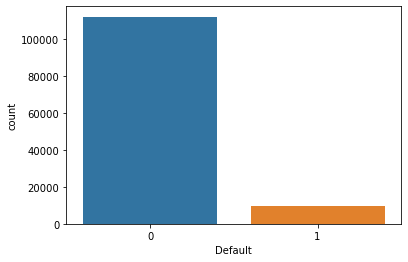

In [64]:
sns.countplot(df_raw['Default'])

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_raw["Accompany_Client"]=encoder.fit_transform(df_raw["Accompany_Client"])
df_raw["Client_Income_Type"]=encoder.fit_transform(df_raw["Client_Income_Type"])
df_raw["Client_Education"]=encoder.fit_transform(df_raw["Client_Education"])
df_raw["Client_Marital_Status"]=encoder.fit_transform(df_raw["Client_Marital_Status"])
df_raw["Client_Gender"]=encoder.fit_transform(df_raw["Client_Gender"])
df_raw["Loan_Contract_Type"]=encoder.fit_transform(df_raw["Loan_Contract_Type"])
df_raw["Client_Housing_Type"]=encoder.fit_transform(df_raw["Client_Housing_Type"])

df_raw["Client_Occupation"]=encoder.fit_transform(df_raw["Client_Occupation"])
df_raw["Type_Organization"]=encoder.fit_transform(df_raw["Type_Organization"])
df_raw["Client_Permanent_Match_Tag"]=encoder.fit_transform(df_raw["Client_Permanent_Match_Tag"])
df_raw["Client_Contact_Work_Tag"]=encoder.fit_transform(df_raw["Client_Contact_Work_Tag"])

In [66]:
missing_data_train = df_raw.isnull()
most_missing = pd.DataFrame(columns=['Column','Percentage'])

for column in missing_data_train.columns.values.tolist(): 
    
    if (np.sum(missing_data_train[column])/missing_data_train[column].count()*100)>20:
        most_missing = most_missing.append({'Column': column,'Percentage':np.sum(missing_data_train[column])/missing_data_train[column].count()*100}, ignore_index=True)
    else:
        continue
most_missing

,Column,Percentage
0,Own_House_Age,46.249672
1,Score_Source_1,56.488806
2,Score_Source_3,22.093290
3,Social_Circle_Default,50.820641
4,Score_Sources_Prod,67.138262


In [67]:
df_raw=df_raw.drop(most_missing['Column'],axis=1)
df_raw=df_raw.drop('ID',axis=1)

In [68]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
df_raw=imputer.fit_transform(df_raw)

df=pd.DataFrame(df_raw,columns=['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2',
        'Phone_Change','Credit_Bureau', 'Default', 'Score_Sources_MIN', 'Score_Sources_MAX',
       'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN', 'Score_Sources_VAR',
       'Loan_annuity_income_ratio',
       'Client_Income_yearly', 'Credit_income_ratio', 'Credit_term',
       'Years_employed_age_ratio'])

In [69]:
X=df.drop("Default",axis=1)
y=df["Default"]
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40,stratify=y)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [82]:
# Creating an object for model and fitting it on training data set 
import lightgbm 
from lightgbm import LGBMClassifier 
from sklearn.metrics import roc_auc_score, classification_report
model = LGBMClassifier(boosting_type= 'dart',
   colsample_bytree= 0.600573227507689,
   is_unbalance= True,
   learning_rate= 0.022871926707233235,
   min_child_samples= 315.0,
   num_leaves= 119.0,
   reg_alpha= 0.8278556502780041,
   reg_lambda= 0.3191590041182836,
   subsample= 0.866481160100224,
    subsample_for_bin= 200000,
   n_estimators= 175) 
model.fit(X_train, y_train) 
  
# Predicting the Target variable 
pred = model.predict(X_test) 
lgm_roc=roc_auc_score(y_test,pred)
print(pred) 
accuracy = model.score(X_test, y_test) 
print(lgm_roc)

[0. 0. 0. ... 0. 0. 0.]
0.6405822181500169


In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92     22403
         1.0       0.24      0.39      0.30      1969

    accuracy                           0.85     24372
   macro avg       0.59      0.64      0.61     24372
weighted avg       0.89      0.85      0.87     24372



## Test Dataset

In [84]:
df_test=pd.read_csv("Test_Dataset.csv")
df_raw=df_test.copy()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

In [85]:
df_raw.loc[df_raw.Own_House_Age >0, 'House_Own'] = 1
df_raw.loc[df_raw.House_Own== 0, 'Own_House_Age'] = 0
df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Occupation'] = "Not Working"
df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Occupation'] = "Self-employed"

df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["#VALUE!"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["$"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].apply(pd.to_numeric)

#df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Income'] = "0"
#df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Income'] = "0"
df_raw["Client_Income"]=df_raw["Client_Income"].replace(["$"],np.nan)
df_raw["Client_Income"]=df_raw["Client_Income"].apply(pd.to_numeric)

df_raw["Credit_Amount"]=df_raw["Credit_Amount"].replace(["$"],np.nan)
df_raw["Credit_Amount"]=df_raw["Credit_Amount"].apply(pd.to_numeric)

df_raw["Age_Days"]=df_raw["Age_Days"].replace(["x"],np.nan)
df_raw["Age_Days"]=df_raw["Age_Days"].apply(pd.to_numeric)
df_raw["Age_Days"]=round(df_raw["Age_Days"]/365,0)

df_raw["Employed_Days"]=df_raw["Employed_Days"].replace(["x"],np.nan)
df_raw["Employed_Days"]=df_raw["Employed_Days"].apply(pd.to_numeric)
df_raw["Employed_Days"]=round(df_raw["Employed_Days"]/365,0)
df_raw["Employed_Days"]=df_raw["Employed_Days"].replace([1001],0)

df_raw["Registration_Days"]=df_raw["Registration_Days"].replace(["x"],np.nan)
df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

df_raw["ID_Days"]=df_raw["ID_Days"].replace(["x"],np.nan)
df_raw["ID_Days"]=df_raw["ID_Days"].apply(pd.to_numeric)

df_raw["Type_Organization"]=df_raw["Type_Organization"].replace(["XNA"],'Not Working')
df_raw['Client_Gender']=df_raw['Client_Gender'].replace(["XNA"],np.nan)

df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["@"],np.nan)
df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["#"],np.nan)
df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].apply(pd.to_numeric)

df_raw["Score_Source_3"]=df_raw["Score_Source_3"].replace(["&"],np.nan)
df_raw["Score_Source_3"]=df_raw["Score_Source_3"].replace(["#"],np.nan)
df_raw['Score_Source_3']=df_raw['Score_Source_3'].apply(pd.to_numeric)
df_raw["Score_Source_2"]=df_raw["Score_Source_2"].replace(["#"],np.nan)
df_raw['Score_Source_2']=df_raw['Score_Source_2'].apply(pd.to_numeric)
df_raw['Score_Source_1']=df_raw['Score_Source_1'].apply(pd.to_numeric)

for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
    feature_name = 'Score_Sources_{}'.format(function_name.upper())
    df_raw[feature_name] = eval('np.{}'.format(function_name))(
        df_raw[['Score_Source_1', 'Score_Source_2', 'Score_Source_3']], axis=1)
df_raw['Score_Sources_Prod'] = df_raw['Score_Source_1'] * df_raw['Score_Source_2'] * df_raw['Score_Source_3']

df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

#Custom Labels
df_raw['Loan_annuity_income_ratio']=df_raw['Loan_Annuity']/df_raw['Client_Income']
df_raw['Client_Income_yearly']=df_raw['Client_Income']*12
df_raw['Credit_income_ratio']=df_raw['Credit_Amount']/df_raw['Client_Income']
df_raw['Credit_term']=df_raw['Credit_Amount']/df_raw['Loan_Annuity']
df_raw['Years_employed_age_ratio']=df_raw["Employed_Days"]/df_raw["Age_Days"]

In [86]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_raw["Accompany_Client"]=encoder.fit_transform(df_raw["Accompany_Client"])
df_raw["Client_Income_Type"]=encoder.fit_transform(df_raw["Client_Income_Type"])
df_raw["Client_Education"]=encoder.fit_transform(df_raw["Client_Education"])
df_raw["Client_Marital_Status"]=encoder.fit_transform(df_raw["Client_Marital_Status"])
df_raw["Client_Gender"]=encoder.fit_transform(df_raw["Client_Gender"])
df_raw["Loan_Contract_Type"]=encoder.fit_transform(df_raw["Loan_Contract_Type"])
df_raw["Client_Housing_Type"]=encoder.fit_transform(df_raw["Client_Housing_Type"])

df_raw["Client_Occupation"]=encoder.fit_transform(df_raw["Client_Occupation"])
df_raw["Type_Organization"]=encoder.fit_transform(df_raw["Type_Organization"])
df_raw["Client_Permanent_Match_Tag"]=encoder.fit_transform(df_raw["Client_Permanent_Match_Tag"])
df_raw["Client_Contact_Work_Tag"]=encoder.fit_transform(df_raw["Client_Contact_Work_Tag"])

In [87]:
df_raw=df_raw.drop(most_missing['Column'],axis=1)
df_raw=df_raw.drop('ID',axis=1)

In [88]:
df_raw.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau', 'Score_Sources_MIN',
       'Score_Sources_MAX', 'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN',
       'Score_Sources_VAR', 'Loan_annuity_income_ratio',
       'Client_Income_yearly', 'Credit_income_ratio', 'Credit_term',
       'Years_employed_age_ratio'],

In [89]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
df_raw=imputer.fit_transform(df_raw)

df=pd.DataFrame(df_raw,columns=['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau', 'Score_Sources_MIN',
       'Score_Sources_MAX', 'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN',
       'Score_Sources_VAR', 'Loan_annuity_income_ratio',
       'Client_Income_yearly', 'Credit_income_ratio', 'Credit_term',
       'Years_employed_age_ratio'])

In [90]:
X_test_data=df
test_pred=model.predict(X_test_data)

In [91]:
final_data=pd.DataFrame()
final_data['ID']=df_test['ID']
final_data['Default']=test_pred
output=final_data.to_csv("final_output_1.csv")